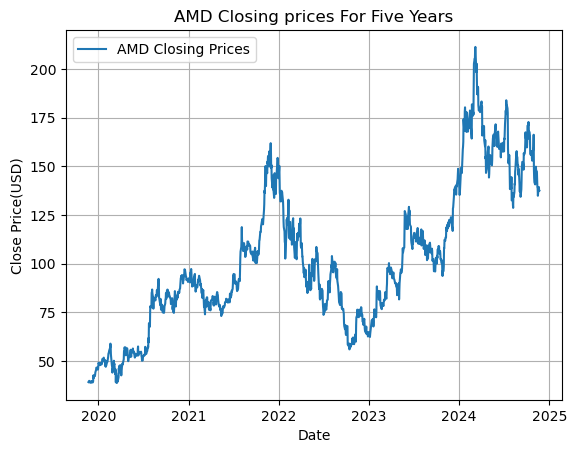

In [88]:
#Visual of Data


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf 


#Fetch Data 
ticker = yf.Ticker('AMD')
dfAMD = ticker.history(period='5y')

#dates = dfAMD.index.to_numpy()
#closing_prices = dfAMD['Close'].to_numpy()

plt.plot(dates, closing_prices, label='AMD Closing Prices')
plt.title('AMD Closing prices For Five Years')
plt.xlabel('Date')
plt.ylabel('Close Price(USD)')
plt.grid(True)
plt.legend()
plt.show()



In [89]:
# Check for Stationary Uisng ADF Test 
from statsmodels.tsa.stattools import adfuller

result = adfuller(dfAMD['Close'])

adf_statistic= result[0]
p_value = result[1]
critical_values = result[4]

print (f'ADF Statistic: {adf_statistic}')
print (f'p-value: {p_value}')
print ('\nCritical Values:')
for key, value in critical_values.items():
    print(f' {key}:{value}')


if result[1]<0.05:
    print("Data is Stationary")
else:
    print("Not Stationary")


    
#p-Value is greater than 0.05 we have to diiference it





ADF Statistic: -1.9552167031470318
p-value: 0.3065473920978382

Critical Values:
 1%:-3.4355629707955395
 5%:-2.863842063387667
 10%:-2.567995644141416
Not Stationary


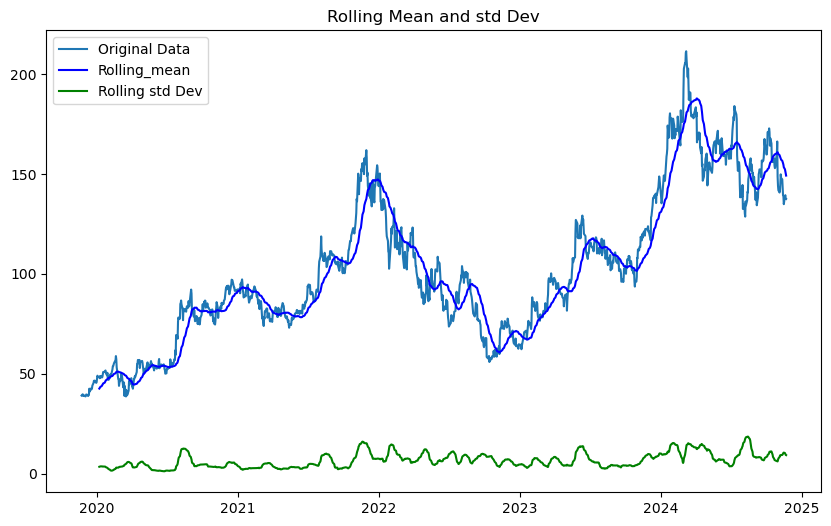

In [90]:
#visual inspection to check stationary 
#using Rolling mean & rolling standard deviation (data will not be constant with high & lows) 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import yfinance as yf
ticker= yf.Ticker('AMD')
dfAMD= ticker.history(period='5y')
rolling_mean = dfAMD['Close'].rolling(window=30).mean()
rolling_std = dfAMD['Close'].rolling(window =30).std()

plt.figure(figsize=(10,6))
plt.plot(dfAMD['Close'], label='Original Data')
plt.plot(rolling_mean, label='Rolling_mean', color='blue')
plt.plot(rolling_std, label='Rolling std Dev', color='green')
plt.legend()
plt.title("Rolling Mean and std Dev")
plt.show()


           

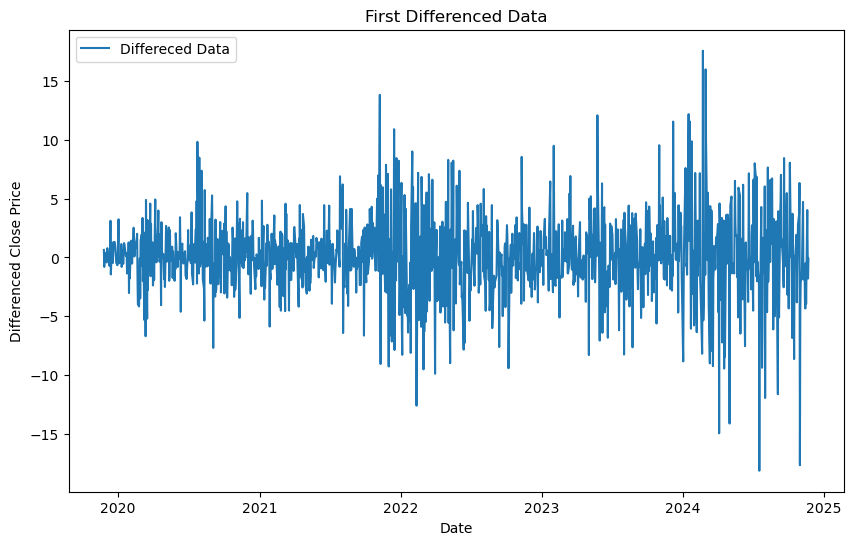

ADF Statistic: -36.57774523761858
p-value: 0.0
Critical Values:
1%: -3.4355671297788666
5%: -2.8638438984080117
10%: -2.5679966213893057
Data is Stationary
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=6682.219, Time=1.70 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=6679.309, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=6679.992, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=6679.976, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=6677.958, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=6681.957, Time=0.22 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 2.202 seconds
Auto ARIMA Model Summary:
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1258
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -3337.979
Date:                Thu, 21 Nov 2024   AIC                      

In [91]:
#visual inspection to check stationary 
#using Rolling mean & rolling standard deviation (data will not be constant with high & lows) 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import yfinance as yf
from statsmodels.tsa.stattools import adfuller
import pmdarima as pm

ticker= yf.Ticker('AMD')
dfAMD= ticker.history(period='5y')

#first Differencing
dfAMD['diff'] = dfAMD['Close'].diff()

plt.figure(figsize=(10,6))
plt.plot(dfAMD['diff'], label='Differeced Data')
plt.title('First Differenced Data')
plt.xlabel('Date')
plt.ylabel('Differenced Close Price')
plt.legend()
plt.show()

#ADF Test
adf_result_diff = adfuller(dfAMD['diff'].dropna())

print(f'ADF Statistic: {adf_result_diff[0]}')
print(f'p-value: {adf_result_diff[1]}')
print("Critical Values:")
for key, value in adf_result_diff[4].items():
    print(f"{key}: {value}")

if adf_result_diff[1] <0.05:
    print("Data is Stationary")
else:
    print("Data is not Stationary")

# use finction auto to identify parametrs of ARIMA ( p,d,q)

auto_model = pm.auto_arima(dfAMD['Close'],
                           seasonal= False,
                           trace=True,
                           stepwise=True)

print("Auto ARIMA Model Summary:")
print(auto_model.summary())



           

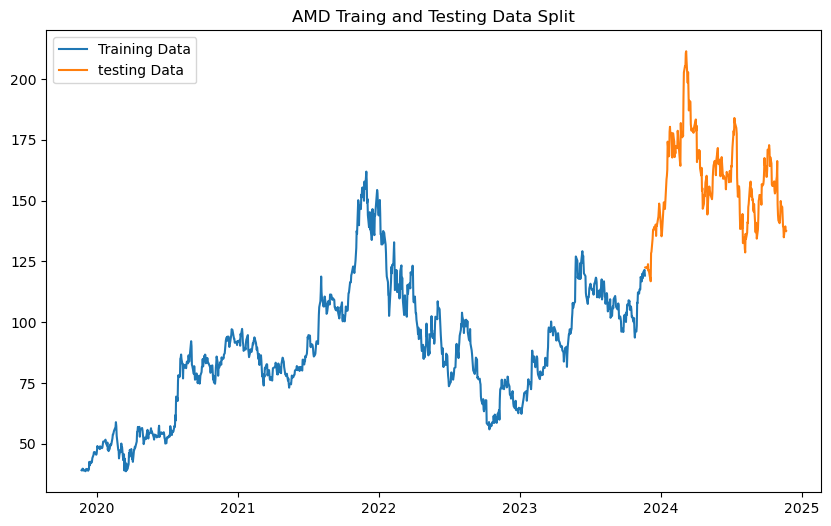

In [111]:
#split data 
train_size = int(len(dfAMD)*0.8)
test= dfAMD['Close'].iloc[train_size:]
train=dfAMD['Close'].iloc[:train_size:]

x_train = dfAMD.index[:train_size].to_numpy()
y_train=train.to_numpy()
x_test = dfAMD.index[train_size:].to_numpy()
y_test=test.to_numpy()


#train_values = train.to_numpy()
#test_values=test.to_numpy()

#plot of data split 
plt.figure(figsize=(10,6))
plt.plot(x_train, y_train, label='Training Data')
plt.plot(x_test, y_test,  label='testing Data')
plt.title('AMD Traing and Testing Data Split') 
plt.legend()
plt.show()

In [109]:
#based on summary we use p=0, d=1, q=0
from statsmodels.tsa.arima.model import ARIMA

#fit the model 
#model = ARIMA(dfAMD['Close'], order= (0,1,0))
#model_fitted = model.fit()

#print(model_fitted.summary())
            


/home/vboxuser/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/vboxuser/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/vboxuser/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1006
Model:                 ARIMA(0, 1, 0)   Log Likelihood                1982.880
Date:                Thu, 21 Nov 2024   AIC                          -3963.759
Time:                        20:18:02   BIC                          -3958.846
Sample:                             0   HQIC                         -3961.892
                               - 1006                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0011   3.52e-05     32.141      0.000       0.001       0.001
Ljung-Box (L1) (Q):                   7.62   Jarque-Bera (JB):               187.08
Prob(Q):                              0.01   Pr

/home/vboxuser/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/vboxuser/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

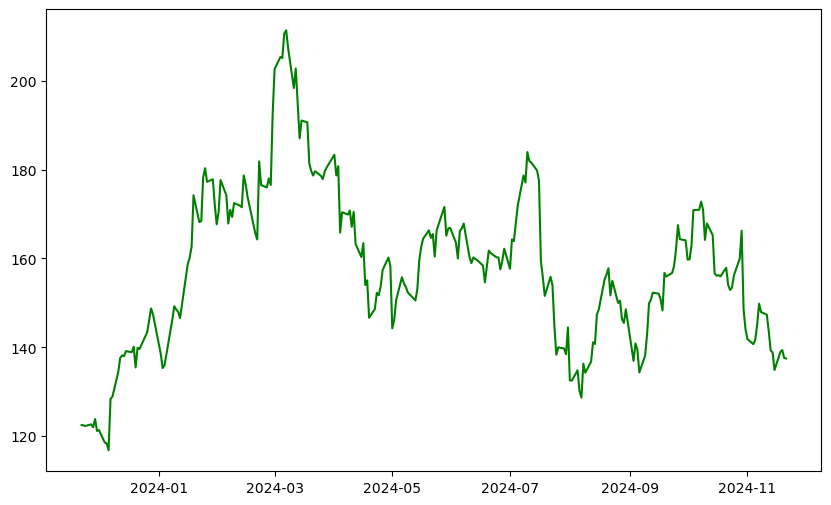

In [105]:
#Train model using ARIMA
from sklearn.metrics import mean_squared_error
model = ARIMA(train_data, order=(0,1,0))
fitted_model= model.fit()
print(fitted_model.summary())

# forecast Test Data 

forecast= fitted_model.forecast(steps=len(test))


#$rmse= np.sqrt(mean_squared_error(test_data, forecast))
#print(f"RMSE:{rmse}")

plt.figure(figsize=(10,6))
plt.plot(x_test,y_test, label='Training Data', color='green')
plt.plot(x_test, forecast, label='test data', color='blue')
plt.title('Forecast vs Actaual data')
plt.legend()
plt.show()
